<a href="https://colab.research.google.com/github/Antonio-Richaud/clasificacion-mnist-cnn/blob/main/Red_Convolucional_con_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal Convolucional utilizando el conjunto de datos MNIST

## Autor: [Antonio Richaud](https://antonio-richaud.com)

In [1]:
# Importar las bibliotecas necesarias
from keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Configurar matplotlib para que las gráficas se muestren en línea en el notebook
%matplotlib inline

In [3]:
# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Imprimir la longitud de los datos de entrenamiento y prueba
print("Train Data Length :", len(x_train))
print("==================================================")
print("Test Data Length :", len(x_test))

Train Data Length : 60000
Test Data Length : 10000


In [4]:
# Imprimir la forma de una imagen de entrenamiento
print("Forma de una imagen de entrenamiento:", x_train[0].shape)

# Imprimir la forma del conjunto de datos de entrenamiento
print("Forma del conjunto de datos de entrenamiento:", x_train.shape)

Forma de una imagen de entrenamiento: (28, 28)
Forma del conjunto de datos de entrenamiento: (60000, 28, 28)


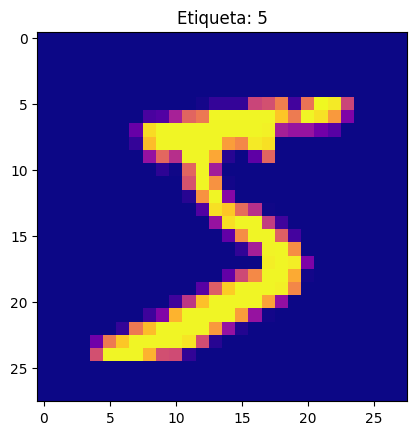

In [10]:
# Visualizar una imagen de entrenamiento
plt.imshow(x_train[0], cmap='plasma')
plt.title(f'Etiqueta: {y_train[0]}')
plt.show()

In [6]:
# Imprimir la etiqueta de la primera imagen de entrenamiento
print("Etiqueta de la primera imagen de entrenamiento:", y_train[0])

Etiqueta de la primera imagen de entrenamiento: 5


In [7]:
# Imprimir los valores únicos de las etiquetas de entrenamiento
print("Valores únicos de las etiquetas de entrenamiento:", np.unique(y_train))

Valores únicos de las etiquetas de entrenamiento: [0 1 2 3 4 5 6 7 8 9]


In [11]:
# Imprimir los valores únicos de las etiquetas de prueba
print("Valores únicos de las etiquetas de prueba:", np.unique(y_test))

Valores únicos de las etiquetas de prueba: [0 1 2 3 4 5 6 7 8 9]


### 1. Visualización de datos del conjunto de entrenamiento

En esta sección, visualizaremos algunas de las imágenes del conjunto de datos de entrenamiento. Esto nos ayudará a entender cómo se ven los datos y a verificar que se han cargado correctamente.

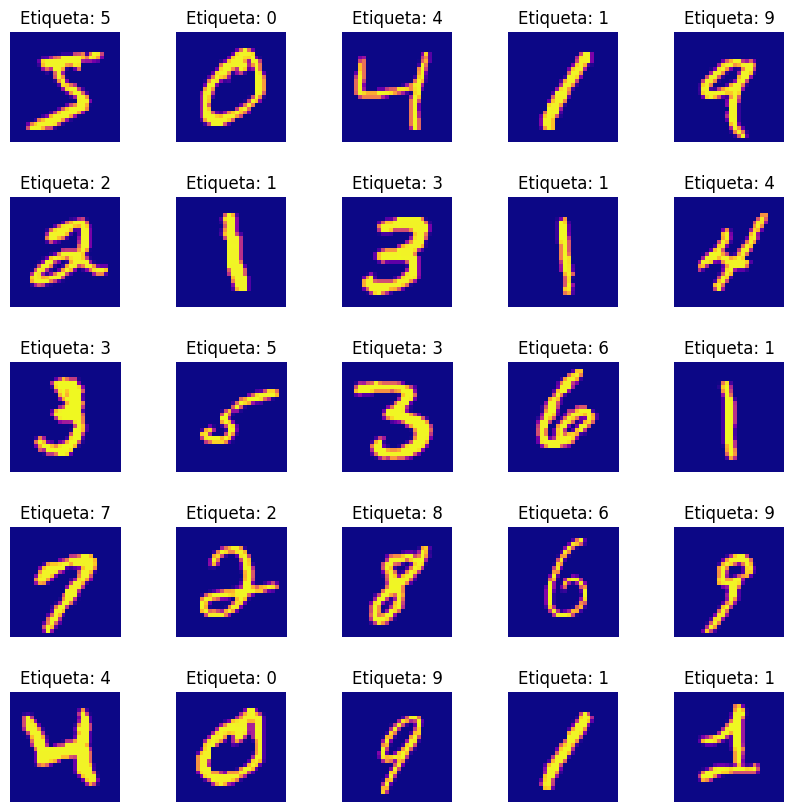

In [12]:
# Visualización de algunas imágenes del conjunto de entrenamiento
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()

for i in range(25):
    # Mostrar la i-ésima imagen del conjunto de entrenamiento
    axes[i].imshow(x_train[i], cmap='plasma')
    axes[i].set_title(f'Etiqueta: {y_train[i]}')
    axes[i].axis('off')

# Ajustar el espacio entre los subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### 2. Visualización de datos del conjunto de prueba

En esta sección, visualizaremos algunas de las imágenes del conjunto de datos de prueba. Esto nos permitirá verificar la consistencia de los datos de prueba y compararlos con los datos de entrenamiento.

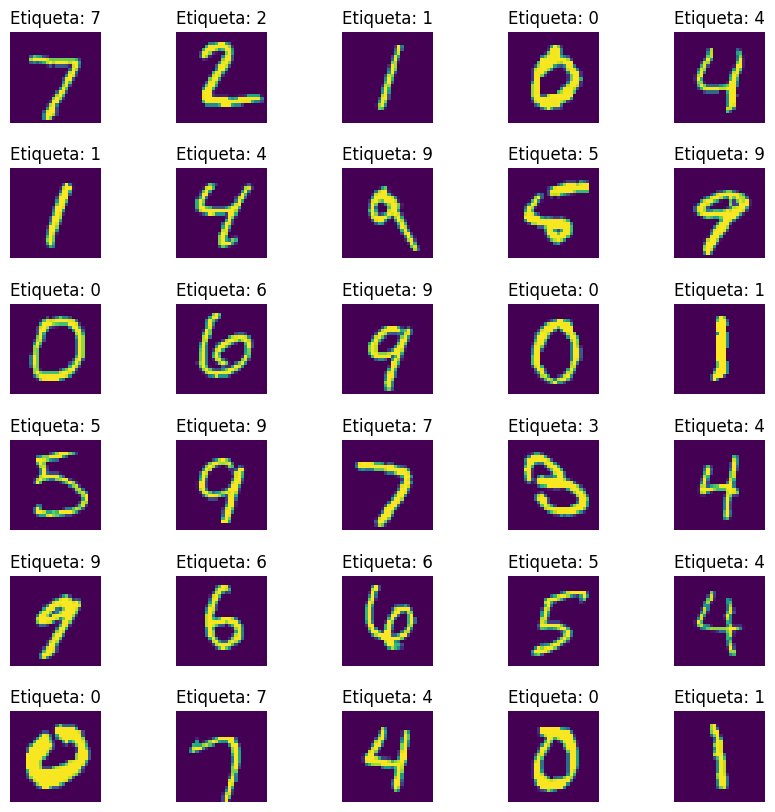

In [14]:
# Visualización de algunas imágenes del conjunto de prueba
fig, ax = plt.subplots(6, 5, figsize=(10, 10))
ax = ax.ravel()

for i in range(30):
    # Mostrar la i-ésima imagen del conjunto de prueba
    ax[i].imshow(x_test[i], cmap='viridis')
    ax[i].set_title(f'Etiqueta: {y_test[i]}')
    ax[i].axis('off')

# Ajustar el espacio entre los subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### 3. Preprocesamiento de los datos de entrada
En esta sección, preprocesaremos los datos de entrada para prepararlos para el entrenamiento del modelo. Esto incluye redimensionar las imágenes, normalizar los valores de los píxeles y ajustar las etiquetas a un formato adecuado.

In [17]:
# Preprocesamiento de los datos de entrada

# Obtener el número de muestras de entrenamiento y prueba
num_train = x_train.shape[0]
num_test = x_test.shape[0]

# Definir la altura y anchura de las imágenes
img_height = 28
img_width = 28

# Redimensionar las imágenes para que tengan una dimensión adicional
x_train = x_train.reshape(num_train, img_height, img_width, 1)
x_test = x_test.reshape(num_test, img_height, img_width, 1)

# Definir la forma de entrada para el modelo
input_shape = (img_height, img_width, 1)

# Convertir los datos a tipo float32 y normalizar los valores de los píxeles
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### 4. Conversión de los vectores de clase a clases binarias

En esta sección, convertiremos las etiquetas de clase a un formato binario adecuado para la clasificación multiclase utilizando una red neuronal. *Esto se conoce como codificación one-hot.*

In [18]:
# Conversión de los vectores de clase a clases binarias (one-hot encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### 5. Definición de la arquitectura del modelo

En esta sección, definiremos la arquitectura de la red neuronal convolucional (CNN) que utilizaremos para clasificar las imágenes del conjunto de datos MNIST. La arquitectura del modelo incluye capas convolucionales, de pooling, de abandono (dropout), de aplanamiento (flatten) y densas (fully connected).

In [19]:
# Importación de las bibliotecas necesarias
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [20]:
# Definición de la arquitectura del modelo

# Crear el modelo secuencial
model = Sequential()

# Añadir la primera capa convolucional con 32 filtros, un tamaño de kernel de 3x3, activación ReLU y forma de entrada
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Añadir la segunda capa convolucional con 64 filtros y un tamaño de kernel de 3x3, activación ReLU
model.add(Conv2D(64, (3, 3), activation='relu'))

# Añadir una capa de pooling con una ventana de 2x2 para reducir la dimensionalidad de las características
model.add(MaxPooling2D(pool_size=(2, 2)))

# Añadir una capa de dropout con una tasa de abandono del 20% para reducir el sobreajuste
model.add(Dropout(0.2))

# Aplanar la salida de las capas anteriores para que pueda ser procesada por las capas densas
model.add(Flatten())

# Añadir una capa densa con 128 unidades y activación ReLU
model.add(Dense(128, activation='relu'))

# Añadir una capa de dropout con una tasa de abandono del 50% para reducir el sobreajuste
model.add(Dropout(0.5))

# Añadir la capa de salida con tantas unidades como clases y activación softmax para la clasificación multiclase
model.add(Dense(num_classes, activation='softmax'))

# Definir la tasa de aprendizaje y crear el optimizador Adam
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compilar el modelo especificando la función de pérdida, el optimizador y las métricas a evaluar
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

# Mostrar un resumen de la arquitectura del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

### 6. Entrenamiento del modelo

En esta sección, entrenaremos el modelo utilizando los datos de entrenamiento. Durante el entrenamiento, el modelo ajustará sus parámetros para minimizar la función de pérdida. También evaluaremos el rendimiento del modelo en los datos de prueba para verificar su capacidad de generalización.

In [21]:
# Entrenamiento del modelo

# Entrenar el modelo con los datos de entrenamiento
history = model.fit(x_train, y_train, batch_size=64, epochs=15, verbose=1, validation_data=(x_test, y_test))

Epoch 1/15
938/938 [==============================] - 186s 194ms/step - loss: 0.2100 - accuracy: 0.9364 - val_loss: 0.0476 - val_accuracy: 0.9836
Epoch 2/15
938/938 [==============================] - 164s 175ms/step - loss: 0.0799 - accuracy: 0.9762 - val_loss: 0.0353 - val_accuracy: 0.9885
Epoch 3/15
938/938 [==============================] - 164s 175ms/step - loss: 0.0599 - accuracy: 0.9821 - val_loss: 0.0343 - val_accuracy: 0.9886
Epoch 4/15
938/938 [==============================] - 159s 169ms/step - loss: 0.0504 - accuracy: 0.9851 - val_loss: 0.0295 - val_accuracy: 0.9905
Epoch 5/15
938/938 [==============================] - 160s 170ms/step - loss: 0.0410 - accuracy: 0.9873 - val_loss: 0.0293 - val_accuracy: 0.9910
Epoch 6/15
938/938 [==============================] - 164s 175ms/step - loss: 0.0350 - accuracy: 0.9893 - val_loss: 0.0299 - val_accuracy: 0.9918
Epoch 7/15
938/938 [==============================] - 156s 166ms/step - loss: 0.0329 - accuracy: 0.9891 - val_loss: 0.0295 -

### 7. Visualización de la precisión del modelo

En esta sección, visualizaremos la precisión del modelo durante el entrenamiento y la validación. Esto nos ayudará a entender cómo está aprendiendo el modelo y si está mejorando con cada iteración.

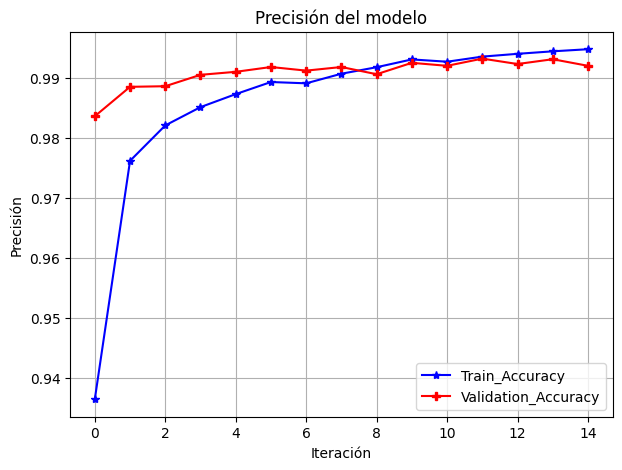

In [25]:
# Visualización de la precisión del modelo durante el entrenamiento

plt.figure(figsize=(7, 5))

# Plotear la precisión del entrenamiento
plt.plot(history.history['accuracy'], label="Train_Accuracy", color="blue", marker="*")

# Plotear la precisión de la validación
plt.plot(history.history['val_accuracy'], label="Validation_Accuracy", color="red", marker="P")

# Añadir una cuadrícula
plt.grid(True)

# Añadir una leyenda
plt.legend()

# Añadir el título y las etiquetas de los ejes
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Iteración')

# Mostrar la gráfica
plt.show()

### 8. Visualización de la pérdida del modelo

En esta sección, visualizaremos la pérdida del modelo durante el entrenamiento y la validación. Esto nos ayudará a entender cómo está disminuyendo la pérdida del modelo con cada iteración.

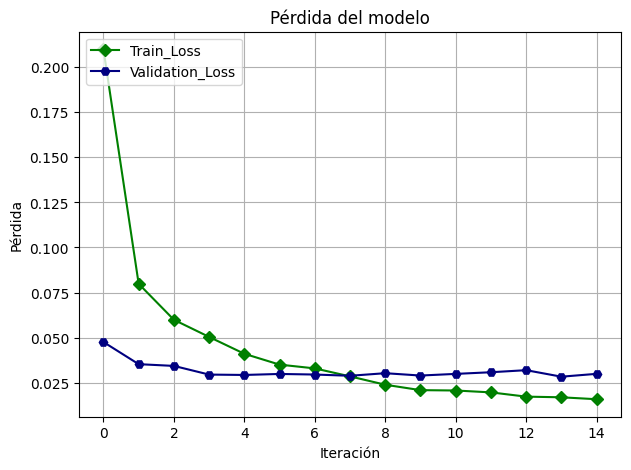

In [24]:
# Visualización de la pérdida del modelo durante el entrenamiento

plt.figure(figsize=(7, 5))

# Plotear la pérdida del entrenamiento
plt.plot(history.history['loss'], color="green", marker="D")

# Plotear la pérdida de la validación
plt.plot(history.history['val_loss'], color="navy", marker="H")

# Añadir una cuadrícula
plt.grid(True)

# Añadir el título y las etiquetas de los ejes
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

# Añadir una leyenda
plt.legend(['Train_Loss', 'Validation_Loss'], loc='upper left')

# Mostrar la gráfica
plt.show()

### 9. Realización de predicciones con el modelo

En esta sección, utilizaremos el modelo entrenado para hacer predicciones sobre el conjunto de datos de prueba. Luego, compararemos las predicciones con las etiquetas reales para evaluar el rendimiento del modelo.

In [26]:
# Realización de predicciones con el modelo

# Predecir las etiquetas del conjunto de datos de prueba
y_pred = model.predict(x_test)

# Obtener las etiquetas reales de los datos de prueba
y_true = np.argmax(y_test, axis=1)

# Convertir las predicciones a etiquetas
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 8s 26ms/step


### 10. Generación y visualización de la matriz de confusión

En esta sección, generaremos y visualizaremos la matriz de confusión para evaluar el rendimiento del modelo. La matriz de confusión nos permite ver cómo se distribuyen las predicciones incorrectas entre las diferentes clases.

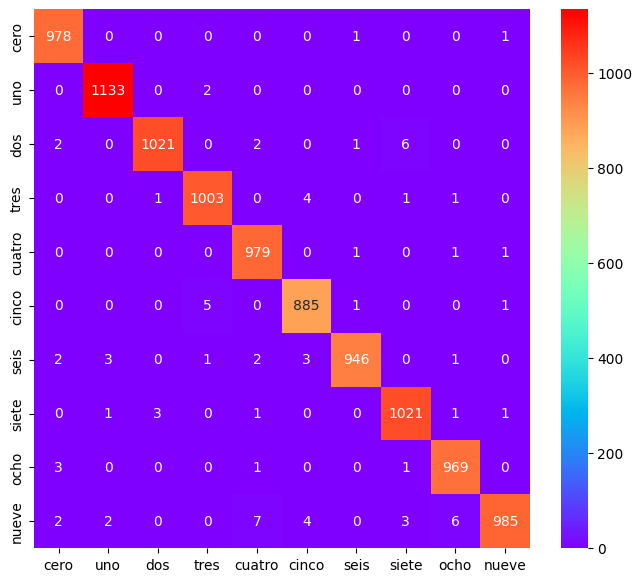

In [27]:
# Generación y visualización de la matriz de confusión

import seaborn as sns

# Etiquetas de clase en español
lab = ["cero", "uno", "dos", "tres", "cuatro", "cinco", "seis", "siete", "ocho", "nueve"]

# Crear una figura de tamaño 8x7 pulgadas
plt.figure(figsize=(8, 7))

# Generar la matriz de confusión
cf = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión usando un mapa de calor
sns.heatmap(cf, annot=True, fmt="d", cmap="rainbow", xticklabels=lab, yticklabels=lab)

# Mostrar la gráfica
plt.show()

### 11. Generación del reporte de clasificación

En esta sección, generaremos un reporte de clasificación para evaluar el rendimiento del modelo en términos de precisión, recall y F1-score para cada clase.

In [28]:
# Generación del reporte de clasificación

print(classification_report(y_true, y_pred, target_names=lab))

              precision    recall  f1-score   support

        cero       0.99      1.00      0.99       980
         uno       0.99      1.00      1.00      1135
         dos       1.00      0.99      0.99      1032
        tres       0.99      0.99      0.99      1010
      cuatro       0.99      1.00      0.99       982
       cinco       0.99      0.99      0.99       892
        seis       1.00      0.99      0.99       958
       siete       0.99      0.99      0.99      1028
        ocho       0.99      0.99      0.99       974
       nueve       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### 12. Generación y visualización de la curva ROC

En esta sección, generaremos y visualizaremos la curva ROC (Receiver Operating Characteristic) para evaluar el rendimiento del modelo en términos de la tasa de verdaderos positivos y la tasa de falsos positivos.

313/313 [==============================] - 7s 22ms/step


<Figure size 1000x700 with 0 Axes>

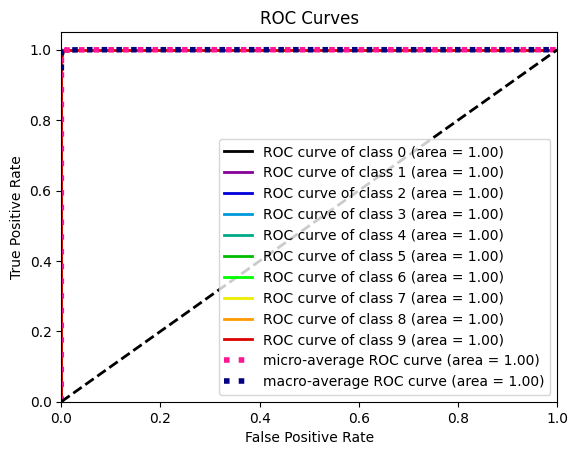

In [30]:
# Instalar la biblioteca scikit-plot
!pip install scikit-plot

# Generación y visualización de la curva ROC

# Predecir las probabilidades del conjunto de datos de prueba
pred = model.predict(x_test)

# Importar la biblioteca scikit-plot
import scikitplot as skplt

# Crear una figura de tamaño 10x7 pulgadas
plt.figure(figsize=(10, 7))

# Generar y visualizar la curva ROC
skplt.metrics.plot_roc(y_true, pred)

# Mostrar la gráfica
plt.show()

### 13. Visualización de las predicciones del modelo

En esta sección, visualizaremos algunas de las imágenes del conjunto de datos de prueba junto con sus etiquetas verdaderas y predichas, así como la probabilidad de la predicción. Esto nos permitirá evaluar visualmente el rendimiento del modelo.

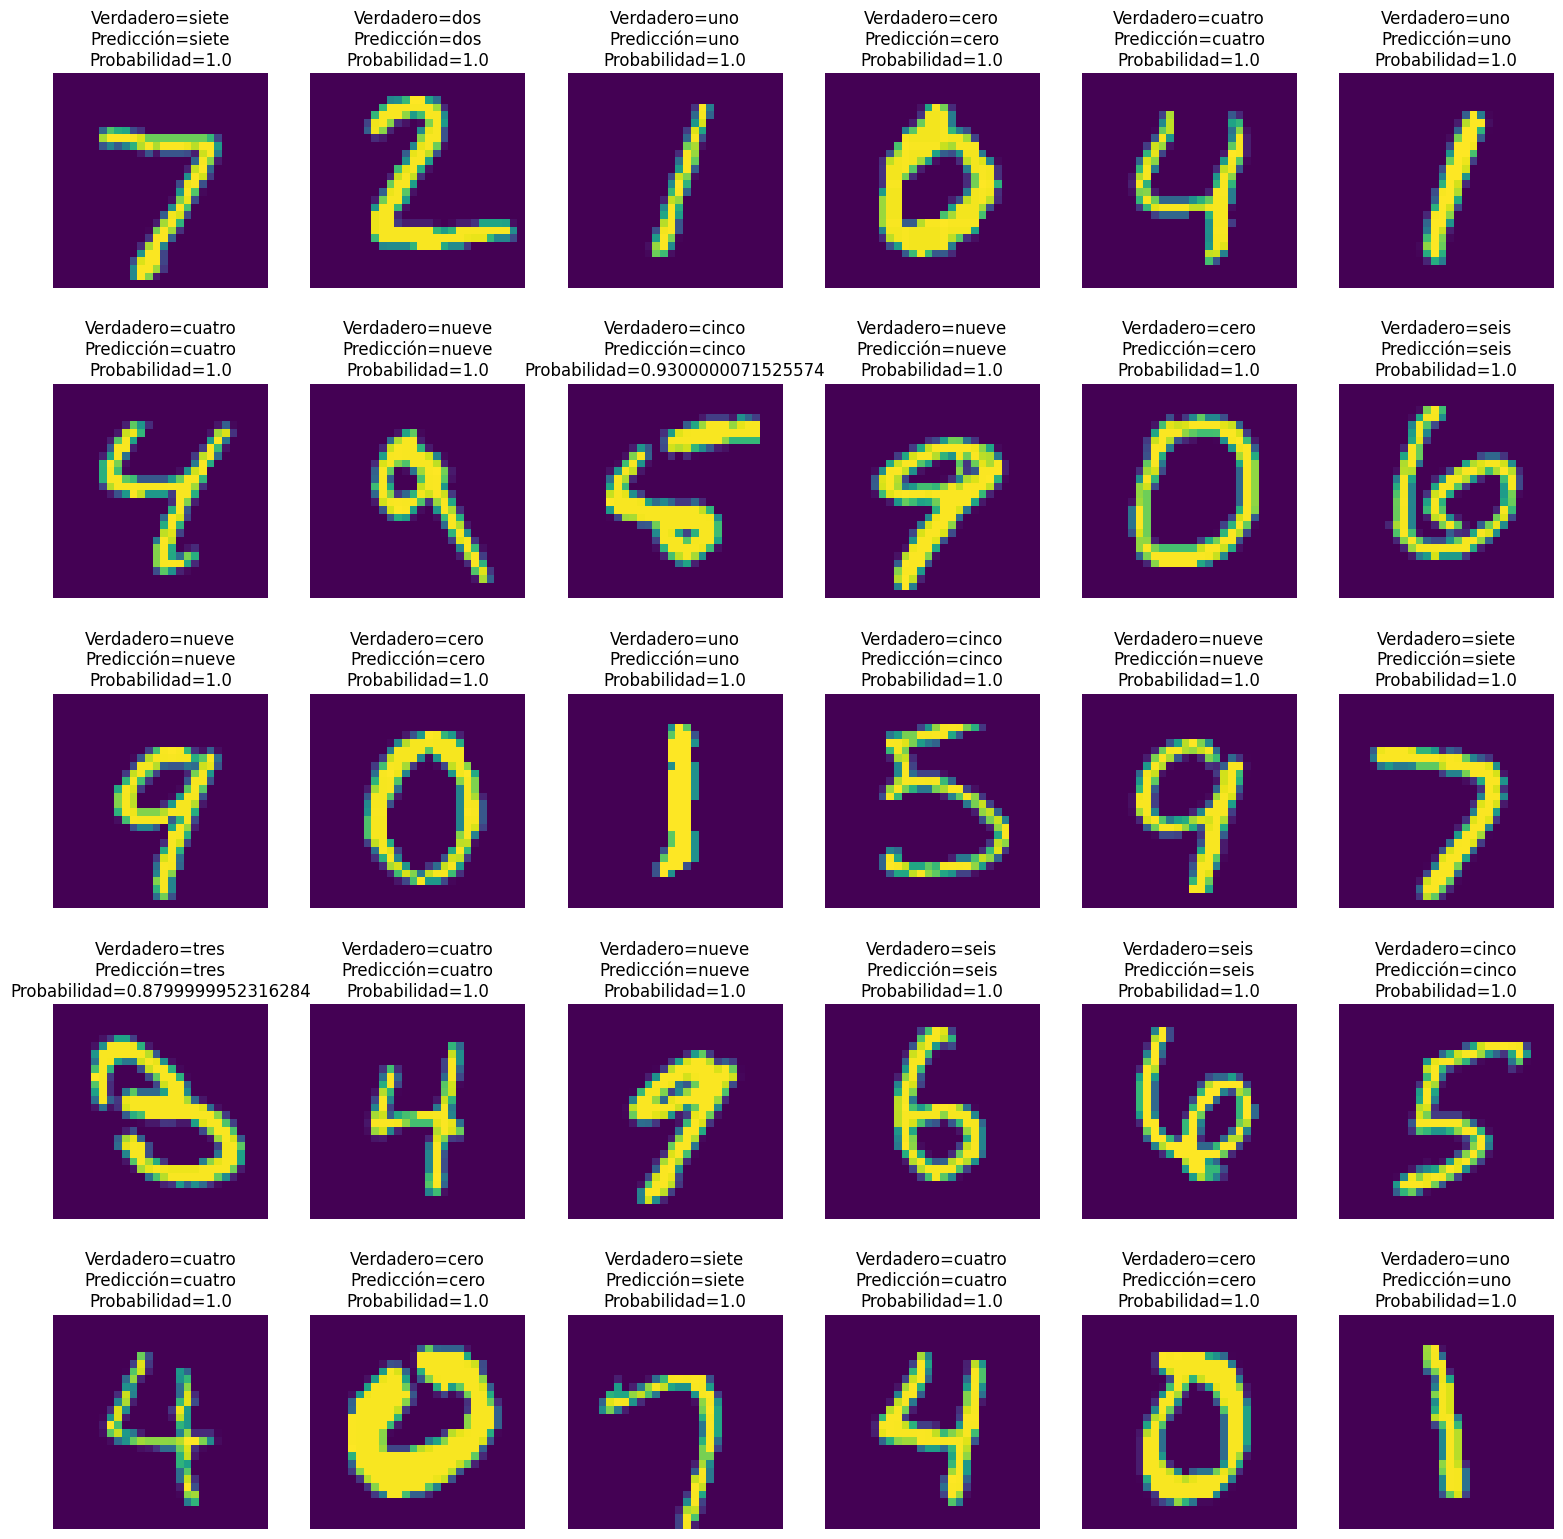

In [31]:
# Visualización de las predicciones del modelo

# Definir el número de filas y columnas para los subplots
row = 5
column = 6

# Crear una figura y ejes para los subplots
fig, ax = plt.subplots(row, column)
fig.set_size_inches(15, 15)

# Inicializar el índice
index = 0

# Iterar sobre las filas y columnas para llenar los subplots
for m in range(0, row):
    for n in range(0, column):
        # Obtener la etiqueta verdadera
        true_data = np.argmax(y_test[index])

        # Obtener la etiqueta predicha
        pred_data = y_pred[index]

        # Obtener la probabilidad de la predicción
        probability = round(pred[index][pred_data], 2)

        # Desactivar los ejes
        ax[m][n].axis("off")

        # Establecer el título del subplot con la etiqueta verdadera, predicha y la probabilidad
        ax[m][n].set_title(f"Verdadero={lab[true_data]}\nPredicción={lab[pred_data]}\nProbabilidad={probability}")

        # Mostrar la imagen en el subplot
        ax[m][n].imshow(x_test[index])

        # Incrementar el índice
        index += 1

# Ajustar los espacios entre los subplots
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.20)

# Mostrar la gráfica
plt.show()

### 14. Predicción de una nueva imagen descargada de la web

En esta sección, descargaremos una imagen desde la web, la preprocesaremos y la utilizaremos para realizar una predicción con el modelo entrenado. Luego, visualizaremos la imagen con la clase predicha anotada sobre ella.

1/1 [==============================] - 0s 112ms/step


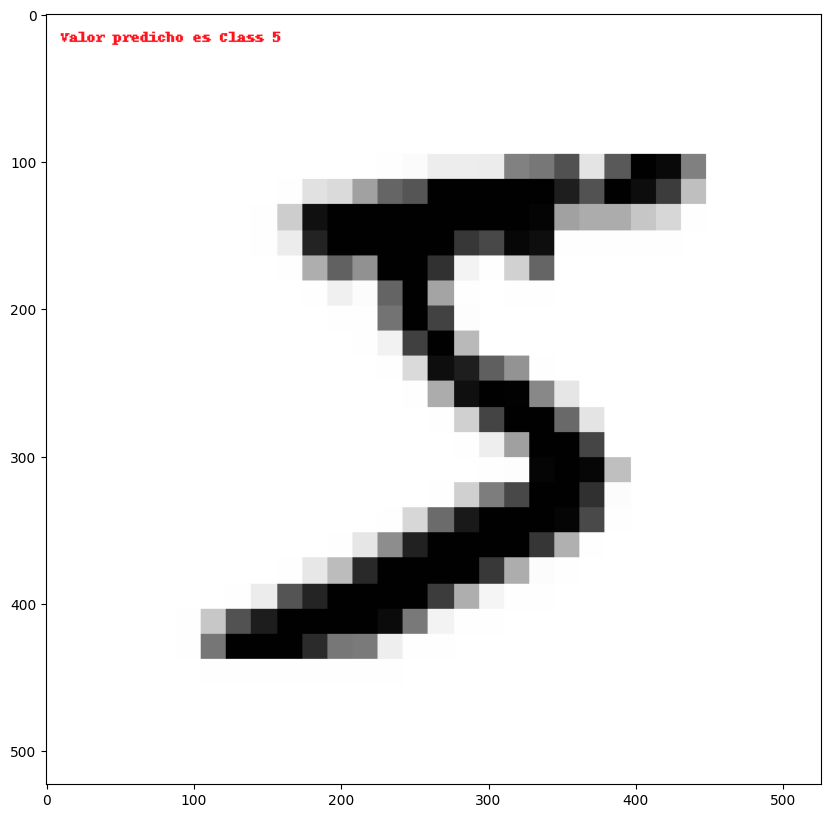

In [34]:
# Importar las bibliotecas necesarias
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
import numpy as np

# Definir el diccionario de resultados
results = { 0: 'Class 0', 1: 'Class 1', 2: 'Class 2', 3: 'Class 3', 4: 'Class 4',
            5: 'Class 5', 6: 'Class 6', 7: 'Class 7', 8: 'Class 8', 9: 'Class 9'}

# Descargar la imagen desde la web
response = requests.get("https://antonio-richaud.com/imagenes/5.png")

# Abrir la imagen descargada
image_path = Image.open(BytesIO(response.content))

# Redimensionar la imagen y convertirla a escala de grises
image_size = (28, 28)
image_resize = image_path.resize(image_size).convert('L')  # 'L' mode converts to grayscale

# Convertir la imagen a un array de numpy
image_array = np.array(image_resize)

# Escalar los valores de los píxeles
image_scale = image_array.astype("float32") / 255.0

# Redimensionar la imagen para que tenga el formato correcto para el modelo
image_reshape = image_scale.reshape(1, 28, 28, 1)

# Realizar la predicción con el modelo
final_pred = model.predict(image_reshape)[0]

# Obtener la clase con la mayor probabilidad
max_prob = np.argmax(final_pred, axis=0)

# Obtener la etiqueta de la clase predicha
my_predict = results[max_prob]

# Configurar la fuente para el texto usando una fuente predeterminada
myFont = ImageFont.load_default()

# Dibujar el texto de la predicción en la imagen
image_draw = ImageDraw.Draw(image_path)
image_draw.text((10, 10), f"Valor predicho es {my_predict}", font=myFont, fill=(255, 20, 30))

# Guardar la imagen con la anotación
image_path.save("my_image.png")

# Abrir la imagen anotada
my_image = Image.open("my_image.png")

# Mostrar la imagen anotada
plt.figure(figsize=(10, 10))
plt.imshow(my_image)
plt.show()

### Resumen

En este notebook, hemos implementado un modelo de red neuronal convolucional (CNN) para la clasificación de dígitos escritos a mano utilizando el conjunto de datos MNIST. A lo largo de las diferentes secciones, hemos llevado a cabo los siguientes pasos:

1. **Importación de bibliotecas**: Se importaron las bibliotecas necesarias para la construcción y evaluación del modelo.
2. **Carga de datos**: Se cargaron los datos de entrenamiento y prueba del conjunto de datos MNIST.
3. **Visualización de datos**: Se visualizaron algunas imágenes de los conjuntos de datos de entrenamiento y prueba para entender mejor los datos.
4. **Preprocesamiento de datos**: Se redimensionaron y normalizaron las imágenes, y se convirtieron las etiquetas a formato one-hot.
5. **Definición de la arquitectura del modelo**: Se construyó el modelo CNN utilizando capas convolucionales, de pooling, de abandono (dropout), de aplanamiento (flatten) y densas.
6. **Entrenamiento del modelo**: Se entrenó el modelo con los datos de entrenamiento y se evaluó su rendimiento en los datos de prueba.
7. **Visualización del rendimiento del modelo**: Se graficaron las curvas de precisión y pérdida durante el entrenamiento y la validación.
8. **Evaluación del modelo**: Se generaron la matriz de confusión y el reporte de clasificación para evaluar el rendimiento del modelo.
9. **Predicción de nuevas imágenes**: Se descargó una imagen desde la web, se preprocesó y se utilizó el modelo para predecir su clase.

### Conclusión

En este proyecto, hemos logrado construir y entrenar con éxito una red neuronal convolucional para la clasificación de dígitos escritos a mano del conjunto de datos MNIST. A través de la visualización de las curvas de precisión y pérdida, y el análisis de la matriz de confusión y el reporte de clasificación, hemos podido evaluar y confirmar el buen rendimiento del modelo. Además, hemos demostrado la capacidad del modelo para realizar predicciones precisas en nuevas imágenes descargadas desde la web.

Este ejercicio no solo resalta la eficacia de las redes neuronales convolucionales en tareas de clasificación de imágenes, sino que también proporciona una base sólida para futuros proyectos de visión por computadora. La capacidad de preprocesar datos, construir modelos complejos y evaluar su rendimiento es fundamental en el campo del aprendizaje automático, y este notebook sirve como una guía práctica para lograr estos objetivos.